In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import torch
import torch.utils.data
import pickle
import sys

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Data Preprocessing

In [95]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

raw_data = pd.read_csv('../data/gpd.csv',index_col=2,na_values='..')
raw_data = raw_data.iloc[:,3:]
raw_data = raw_data.dropna(axis=0,how='all').dropna(axis=1,how='all')
raw_data = raw_data.rename({old: int(old.split()[0]) for old in raw_data.columns}, axis=1)
raw_data = raw_data.sort_values(2017,ascending=False).iloc[:80]

percentage_data = raw_data/np.sum(raw_data,axis=0)



rate_data = pd.read_csv('../data/gpd_grow_rate.csv',index_col=0,na_values='..')
rate_data = rate_data.iloc[:,3:]
rate_data = rate_data.dropna(axis=0,how='all').dropna(axis=1,how='all')
rate_data = rate_data.rename({old: int(old.split()[0]) for old in rate_data.columns}, axis=1)
rate_data = rate_data/100




target_years = np.arange(1975,2020,5)
result = []



for country in percentage_data.index:
    country_percentage_data = percentage_data.loc[country]
    country_rate_data = rate_data.loc[country]
    for target_year in target_years:
        target_year_list = [year for year in np.arange(target_year-5,target_year+1)]
        target_percentage_data = country_percentage_data[target_year_list]
        target_rate_data = country_rate_data[target_year_list]
        
        if target_rate_data.isnull().sum() > 0 or target_percentage_data.isnull().sum() > 0:
            continue
        else:
            result.append([country+' '+str(target_year-5)+'~'+str(target_year)]+\
                          target_rate_data.values.tolist()+ target_percentage_data.values.tolist())
            
            
            
final_df = pd.DataFrame(result)
final_df.head(30)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,United States 1970~1975,0.001860,0.032955,0.052633,0.056431,-0.005172,-0.001977,0.394659,0.387848,0.369092,0.337376,0.318136,0.310788
1,United States 1975~1980,-0.001977,0.053861,0.046086,0.055617,0.031757,-0.002446,0.310788,0.317684,0.312163,0.299361,0.287889,0.274392
2,United States 1980~1985,-0.002446,0.025945,-0.019109,0.046325,0.072591,0.042387,0.274392,0.297256,0.312908,0.333440,0.356426,0.364080
3,United States 1985~1990,0.042387,0.035116,0.034617,0.042040,0.036805,0.019194,0.364080,0.324597,0.300470,0.289631,0.289762,0.270127
4,United States 1990~1995,0.019194,-0.000741,0.035554,0.027459,0.040376,0.027190,0.270127,0.266578,0.265867,0.274522,0.271172,0.255607
5,United States 1995~2000,0.027190,0.037959,0.044870,0.044499,0.046852,0.040922,0.255607,0.264456,0.282508,0.298941,0.306570,0.316322
6,United States 2000~2005,0.040922,0.009760,0.017861,0.028068,0.037857,0.033452,0.316322,0.328495,0.326538,0.304839,0.288567,0.284601
7,United States 2005~2010,0.033452,0.026666,0.017786,-0.002916,-0.027755,0.025319,0.284601,0.278305,0.258424,0.240048,0.248055,0.235345
8,United States 2010~2015,0.025319,0.016015,0.022240,0.016773,0.025692,0.028616,0.235345,0.219154,0.223412,0.224613,0.228647,0.251177
9,China 1970~1975,0.193000,0.070600,0.038100,0.077600,0.023100,0.087200,0.033969,0.033147,0.032720,0.032720,0.029616,0.030074


# Build DataLoader

In [44]:
class GDP_Dataset(torch.utils.data.Dataset):
    
    def __init__(self, df, device):
        
        self.df = df
        self.device = device
        self.country_year = self.df.iloc[:,0]
        self.tensor_data = torch.from_numpy(self.df.iloc[:,1:].values.astype('float')).float().to(self.device)
        
    def __len__(self):
        return self.df.shape[0]
    
    def __getitem__(self, idx):
        return self.country_year[idx],self.tensor_data[idx,:]


def cycle(iterable):
    while True:
        for x in iterable:
            yield x
            



gdp_dataset = GDP_Dataset(final_df, device)
gdp_batch = torch.utils.data.DataLoader(gdp_dataset, batch_size=64, shuffle=True)
gdp_batch_val = torch.utils.data.DataLoader(gdp_dataset, batch_size=64, shuffle=True)

batch_iterator =iter(cycle(gdp_batch))

# Generator, Discriminator, Encoder

In [5]:
class Generator(torch.nn.Module):

    def __init__(self, target_size, hidden_size=32, z_norm_size=3, z_one_hot_size=4, num_layers=2):
        
        super().__init__()
        self.first_layer = torch.nn.Linear(in_features=z_norm_size+z_one_hot_size, out_features=hidden_size)
        self.first_layer_bn = torch.nn.BatchNorm1d(hidden_size)
        self.last_layer = torch.nn.Linear(in_features=hidden_size, out_features=target_size)
        
        #self.hidden_activation = torch.nn.LeakyReLU(0.2)
        self.hidden_activation = torch.nn.ReLU()
        
        
        self.middle_layers = torch.nn.ModuleList([torch.nn.Linear(hidden_size,hidden_size), torch.nn.BatchNorm1d(hidden_size),
                                                  self.hidden_activation])
        
        for i in range(0,num_layers-1):
            self.middle_layers.extend([torch.nn.Linear(hidden_size,hidden_size), torch.nn.BatchNorm1d(hidden_size),
                                                  self.hidden_activation])
            
    def forward(self, x):
        
        x = self.first_layer(x)
        x = self.first_layer_bn(x)
        x = self.hidden_activation(x)
        for layer in self.middle_layers:
            x = layer(x)
        x = self.last_layer(x)
        return x
        
        
        
class Discriminator(torch.nn.Module):
    
    def __init__(self, target_size, hidden_size=32, num_layers=2):
        super().__init__()
        
        self.first_layer = torch.nn.Linear(in_features=target_size, out_features=hidden_size)
        self.first_layer_bn = torch.nn.BatchNorm1d(hidden_size)
        self.last_layer = torch.nn.Linear(in_features=hidden_size, out_features=1)
        
        #self.hidden_activation = torch.nn.LeakyReLU(0.2)
        self.hidden_activation = torch.nn.ReLU()
        
        self.middle_layers = torch.nn.ModuleList([torch.nn.Linear(hidden_size,hidden_size), torch.nn.BatchNorm1d(hidden_size),
                                                  self.hidden_activation])
        
        for i in range(0,num_layers-1):
            self.middle_layers.extend([torch.nn.Linear(hidden_size,hidden_size), torch.nn.BatchNorm1d(hidden_size),
                                                  self.hidden_activation])
            
            
    def forward(self,x):
        
        x = self.first_layer(x)
        x = self.first_layer_bn(x)
        x = self.hidden_activation(x)
        for layer in self.middle_layers:
            x = layer(x)
        x = self.last_layer(x)
        
        return x.flatten()
        
        
        
        
class Encoder(torch.nn.Module):
    
    def __init__(self, target_size, hidden_size=32, z_norm_size=3, z_one_hot_size=4, num_layers=2):
        super().__init__()
        
        self.z_norm_size = z_norm_size
        self.z_one_hot_size = z_one_hot_size
        
        self.first_layer = torch.nn.Linear(in_features=target_size, out_features=hidden_size)
        self.first_layer_bn = torch.nn.BatchNorm1d(hidden_size)
        
        self.last_layer = torch.nn.Linear(in_features=hidden_size, out_features=z_norm_size+z_one_hot_size)
        
        #self.hidden_activation = torch.nn.LeakyReLU(0.2)
        self.hidden_activation = torch.nn.ReLU()
        
        
        self.middle_layers = torch.nn.ModuleList([torch.nn.Linear(hidden_size,hidden_size), torch.nn.BatchNorm1d(hidden_size),
                                                  self.hidden_activation])
        
        for i in range(0,num_layers-1):
            self.middle_layers.extend([torch.nn.Linear(hidden_size,hidden_size), torch.nn.BatchNorm1d(hidden_size),
                                                  self.hidden_activation])
            
    def forward(self, x):
        
        x = self.first_layer(x)
        x = self.first_layer_bn(x)
        x = self.hidden_activation(x)
        for layer in self.middle_layers:
            x = layer(x)
        x = self.last_layer(x)
        
        
        return x[:,:self.z_norm_size], x[:,-self.z_one_hot_size:]

# Create model and initalize para and optimizor

In [6]:
def generate_Models(target_size, z_norm_size=3, z_one_hot_size=4, hidden_size=16, num_layers=2,
                   device = device):
    generator = Generator(target_size, hidden_size=hidden_size, z_norm_size=z_norm_size,
                          z_one_hot_size=z_one_hot_size, num_layers=num_layers).to(device)
    discriminator = Discriminator(target_size, hidden_size=hidden_size, num_layers=num_layers).to(device)
    encoder = Encoder(target_size, hidden_size=hidden_size, z_norm_size=z_norm_size, 
                      z_one_hot_size=z_one_hot_size, num_layers=num_layers).to(device)
    
    para_init(generator)
    para_init(discriminator)
    para_init(encoder)
    
    return generator, discriminator, encoder

def get_Optimizer(generator, discriminator, encoder, lr=0.00005, weight_decay=0.001):
    generator_opti = torch.optim.RMSprop([para for para in generator.parameters() if para.requires_grad],
                                         lr=lr,weight_decay=weight_decay)
    discriminator_opti = torch.optim.RMSprop([para for para in discriminator.parameters() if para.requires_grad],
                                             lr=lr, weight_decay=weight_decay)
    encoder_opti = torch.optim.RMSprop([para for para in encoder.parameters() if para.requires_grad],lr=lr, 
                                       weight_decay=weight_decay)
    return generator_opti, discriminator_opti, encoder_opti
    
    
def para_init(model):
    for name, para in model.named_parameters():
        if len(para.shape) > 1:
            torch.nn.init.normal_(para, mean=0, std=0.01)

# Cycle loss based on Backpropagation-based K-Cluster

In [7]:
def backpropagation_based_k_Cluster(generator, z_norm_size=3, z_one_hot_size=4, weight_decay=0.0, device=device):
    total_loss = 0
    generator.eval()
    for batch_label, batch_data in gdp_batch_val:
        record = None
        for k in range(z_one_hot_size):
            batch_size = batch_data.shape[0]
            z_n = torch.zeros(batch_size, z_norm_size).normal_(0, 0.1).to(device)
            z_n.requires_grad=True
            z_c = torch.zeros(batch_size, z_one_hot_size).to(device)
            z_c[:,k] = 1
            z = torch.cat([z_n, z_c], dim=1)

            opti = torch.optim.Adam([z_n], lr=0.001, weight_decay=weight_decay)

            for time in range(1000):
                opti.zero_grad()
                loss = torch.nn.functional.mse_loss(generator(z), batch_data.float())
                loss.backward()
                opti.step()
                z_n.data.clamp_(-0.6, 0.6)
                z = torch.cat([z_n, z_c], dim=1)

            k_loss = torch.sum(torch.nn.functional.mse_loss(generator(z), batch_data.float(),reduction='none'), dim=1).view(-1,1)
            if record is None:
                record = k_loss.detach()
            else:
                record = torch.cat([record,k_loss.detach()], dim=1)

        batch_min, batch_index = record.min(1)
        total_loss += torch.sum(batch_min).item()
        
    return total_loss

# Cycle loss based on Encoder-based latent vector reconstruction

In [8]:
def encoder_recover(generator, encoder, z_norm_size=3, z_one_hot_size=4, weight_decay=0.0, device=device):
    total_loss = 0
    generator.eval()
    encoder.eval()
    for batch_label, batch_data in gdp_batch_val:
        batch_data = batch_data.float()
        z_n,z_c = encoder(batch_data)
        batch_size = batch_data.shape[0]
        nb_digits = z_c.shape[1]
        v,y = z_c.max(dim=1)
        y = y.view(-1,1)
        y_onehot = torch.FloatTensor(batch_size, nb_digits).to(device)

        
        y_onehot.zero_()

        y_onehot.scatter_(1, y, 1)
        z = torch.cat([z_n, y_onehot], dim=1)
        loss = torch.nn.functional.mse_loss(generator(z), batch_data, reduction='sum') 
        total_loss += loss.detach().item()
        
    return total_loss

# Training

In [11]:
def train(batch_data, generator, discriminator, encoder, generator_opti, discriminator_opti, encoder_opti,
         c = 0.02, n_critic=5, z_norm_size=3, z_one_hot_size=4, default_batch_size=64, total_times = 10000):
    current_time = 0
    record1_loss = []
    record2_loss = []
    val_loss = []
    e_g_loss = []
    
    best_loss = float('inf')
    
    
    while current_time < total_times:
        current_time += 1
        generator.train()
        discriminator.train() 
        encoder.train() 
        
        for times in range(n_critic):
            
            discriminator_opti.zero_grad()
            
            real_label, real_data = next(batch_data)
            real_data = real_data.float()
            batch_size = real_data.shape[0]
        
            z_n = torch.zeros(batch_size, z_norm_size).normal_(0, 0.1).to(device)
            idx = torch.randint(0,z_one_hot_size,size=(1,batch_size)).squeeze()
            z_c = torch.zeros(len(idx), idx.max()+1).scatter_(1, idx.unsqueeze(1), 1.).to(device)
            
            if z_c.shape[1] < z_one_hot_size:
                z_c = torch.cat([z_c, torch.zeros(batch_size, z_one_hot_size - z_c.shape[1]).to(device)], dim=1)
            
            z = torch.cat([z_n,z_c], dim=1)
            
            generated_data = generator(z)
            
            real_score = discriminator(real_data)
            
            fake_score = discriminator(generated_data)
            
            loss = -(torch.mean(real_score) - torch.mean(fake_score))
            
            loss.backward()
            
            discriminator_opti.step()
            
            for p in discriminator.parameters():
                    p.data.clamp_(-c,c)
                    
            record1_loss.append(loss.detach().item())
                    
        
        encoder_opti.zero_grad()
        generator_opti.zero_grad()
        
        z_n = torch.zeros(default_batch_size, z_norm_size).normal_(0, 0.1).to(device)
        idx = torch.randint(0,z_one_hot_size,size=(1,default_batch_size)).squeeze()
        z_c = torch.zeros(len(idx), idx.max()+1).scatter_(1, idx.unsqueeze(1), 1.).to(device)
        idx = idx.to(device)
        
        if z_c.shape[1] < z_one_hot_size:
                z_c = torch.cat([z_c, torch.zeros(default_batch_size, z_one_hot_size - z_c.shape[1]).to(device)], dim=1)
                
        z = torch.cat([z_n,z_c], dim=1).to(device)
        
        generated_data = generator(z)
        fake_score = discriminator(generated_data)
        z_n_fake, z_c_fake = encoder(generated_data)
        
        
        generator_loss = -torch.mean(fake_score)
        cycle_loss = torch.nn.functional.mse_loss(z_n, z_n_fake) +\
                            torch.nn.functional.cross_entropy(z_c_fake, idx)
        total_loss = generator_loss + cycle_loss
                
                
        total_loss.backward()
        encoder_opti.step()
        generator_opti.step()
        
        
        record2_loss.append(cycle_loss.detach().item())
        
        
        if current_time == 1 or current_time%200 == 0:
            temp_e_g_loss = encoder_recover(generator, encoder, weight_decay=back_weight_decay,z_norm_size=z_norm_size, 
                    z_one_hot_size=z_one_hot_size, device=device)
            e_g_loss.append(temp_e_g_loss)
            
            temp_loss = backpropagation_based_k_Cluster(generator, weight_decay=back_weight_decay,z_norm_size=z_norm_size, 
                    z_one_hot_size=z_one_hot_size, device=device)
            print(temp_loss)
            sys.stdout.flush()
            val_loss.append(temp_loss)
            
            if temp_loss < best_loss:
                best_loss = temp_loss
                torch.save(generator.state_dict(), '../store/'+str(z_one_hot_size)+'/generator.pt')
                torch.save(discriminator.state_dict(), '../store/'+str(z_one_hot_size)+'/discriminator.pt')
                torch.save(encoder.state_dict(), '../store/'+str(z_one_hot_size)+'/encoder.pt')
        
    return record1_loss, record2_loss, val_loss, e_g_loss

# Start training, store model and result

In [12]:
de_weight_decay = 0.001
back_weight_decay = 0.1
z_norm_size=2
z_one_hot_size=4
target_size = 12
hidden_size = 32

In [13]:
generator, discriminator, encoder = generate_Models(target_size,z_norm_size=z_norm_size,z_one_hot_size=z_one_hot_size,
                                                   hidden_size = hidden_size)
generator_opti, discriminator_opti, encoder_opti = get_Optimizer(generator, discriminator, encoder, 
                                                                 weight_decay=gde_weight_decay)



gdp_batch_val = torch.utils.data.DataLoader(gdp_dataset, batch_size=64, shuffle=True)

record1_loss, record2_loss, val_loss, e_g_loss = train(cycle(gdp_batch), generator, discriminator, encoder, 
                                   generator_opti, discriminator_opti, encoder_opti,z_norm_size=z_norm_size,
                                             z_one_hot_size=z_one_hot_size)


pickle.dump(record1_loss, open('../store/'+str(z_one_hot_size)+'/record1_loss.pt','wb'))
pickle.dump(record2_loss, open('../store/'+str(z_one_hot_size)+'/record2_loss.pt','wb'))
pickle.dump(val_loss, open('../store/'+str(z_one_hot_size)+'/val_loss.pt','wb'))
pickle.dump(e_g_loss, open('../store/'+str(z_one_hot_size)+'/e_g_loss.pt','wb'))

torch.save(generator.state_dict(), '../store/'+str(z_one_hot_size)+'/generator_final.pt')
torch.save(discriminator.state_dict(), '../store/'+str(z_one_hot_size)+'/discriminator_final.pt')
torch.save(encoder.state_dict(), '../store/'+str(z_one_hot_size)+'/encoder_final.pt')

# Load all types of training loss and evalation loss

In [23]:
record1_loss_good = pickle.load(open('../store/'+str(z_one_hot_size)+'/record1_loss.pt','rb'))
record2_loss_good = pickle.load(open('../store/'+str(z_one_hot_size)+'/record2_loss.pt','rb'))
val_loss_good = pickle.load(open('../store/'+str(z_one_hot_size)+'/val_loss.pt','rb'))
e_g_loss_good = pickle.load(open('../store/'+str(z_one_hot_size)+'/e_g_loss.pt','rb'))

In [17]:
record1_loss_bad = pickle.load(open('../store/bad/record1_loss.pt','rb'))
record2_loss_bad = pickle.load(open('../store/bad/record2_loss.pt','rb'))
val_loss_bad = pickle.load(open('../store/bad/val_loss.pt','rb'))
e_g_loss_bad = pickle.load(open('../store/bad/e_g_loss.pt','rb'))

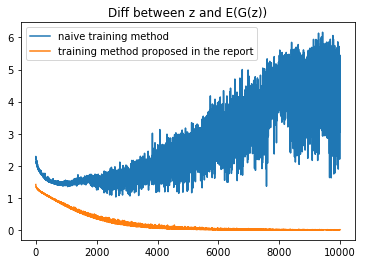

In [204]:
plt.plot(record2_loss_bad,label='naive training method')
plt.plot(record2_loss_good, label='training method proposed in the report')
plt.title('Diff between z and E(G(z))')
plt.legend()
plt.show()

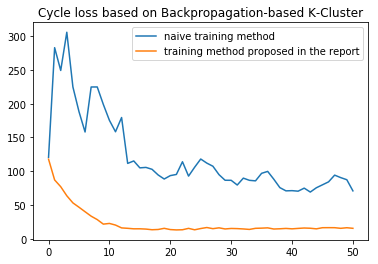

In [205]:
plt.plot(val_loss_bad,label='naive training method')
plt.plot(val_loss_good, label='training method proposed in the report')
plt.title('Cycle loss based on Backpropagation-based K-Cluster')
plt.legend()
plt.show()

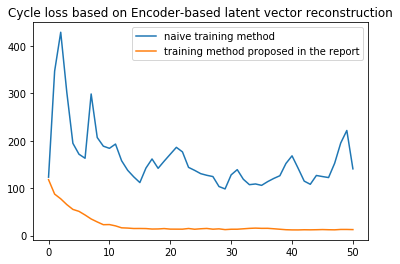

In [40]:
plt.plot(e_g_loss_bad,label='naive training method')
plt.plot(e_g_loss_good, label='training method proposed in the report')
plt.title('Cycle loss based on Encoder-based latent vector reconstruction')
plt.legend()
plt.show()

# apply Backpropagation-based K-Cluster to recover latent vector from real data

In [42]:
def backpropagation_based_K_Cluster(generator, z_norm_size=3, z_one_hot_size=4, weight_decay=0.0, device=device):
    total_loss = 0
    generator.eval()
    final_result = []
    
    for batch_label, batch_data in gdp_batch_val:
        record = None
        for k in range(z_one_hot_size):
            batch_size = batch_data.shape[0]
            z_n = torch.zeros(batch_size, z_norm_size).normal_(0, 0.1).to(device)
            z_n.requires_grad=True
            z_c = torch.zeros(batch_size, z_one_hot_size).to(device)
            z_c[:,k] = 1
            z = torch.cat([z_n, z_c], dim=1)

            opti = torch.optim.Adam([z_n], lr=0.001, weight_decay=weight_decay)

            for time in range(1000):
                opti.zero_grad()
                loss = torch.nn.functional.mse_loss(generator(z), batch_data.float())
                loss.backward()
                opti.step()
                z_n.data.clamp_(-0.6, 0.6)
                z = torch.cat([z_n, z_c], dim=1)

            k_loss = torch.sum(torch.nn.functional.mse_loss(generator(z), batch_data.float(),reduction='none'), dim=1).view(-1,1)
            if record is None:
                record = k_loss.detach()
            else:
                record = torch.cat([record,k_loss.detach()], dim=1)

        batch_min, batch_index = record.min(1)
        t = [(' '.join(country.split()[:-1]), country.split()[-1],group.item()) for country,group in zip(batch_label, batch_index)]
        final_result.extend(t)
        total_loss += torch.sum(batch_min).item()
        
    return final_result

In [41]:
generator.load_state_dict(torch.load('../store/4/generator_final.pt'))

In [45]:
final_result = backpropagation_based_K_Cluster(generator, weight_decay=back_weight_decay,z_norm_size=z_norm_size,
                                             z_one_hot_size=z_one_hot_size, device=device)

In [216]:
final_df = pd.DataFrame(final_result)

target_years = np.arange(1975,2020,5)
target_years = [str(start_year-5) + '~' + str(start_year) for start_year in target_years]

temp_data = np.empty((len(final_df[0].unique()), len(target_years)))
temp_data[:]=np.nan
demo_pf = pd.DataFrame(temp_data, final_df[0].unique(), target_years)

for country in final_df[0].unique():
    for target_str in target_years:
        target_value = (final_df[(final_df[0]==country) & (final_df[1]==target_str)][2])
        if len(target_value.values):
            demo_pf.loc[country,target_str] = int(target_value.values[0])
            
result = demo_pf.loc[raw_data.index]

result

,1970~1975,1975~1980,1980~1985,1985~1990,1990~1995,1995~2000,2000~2005,2005~2010,2010~2015
Country Name,,,,,,,,,
United States,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
China,0.0,2.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0
Japan,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Germany,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
United Kingdom,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
India,2.0,0.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0
France,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Brazil,0.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,0.0
Italy,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [84]:
def group(x):
    base = Counter({0.0:0,1.0:0,2.0:0,3.0:0})
    current_count = Counter(x)
    base.update(current_count)
    result_dict = {int(key):value for key,value in base.items() if ~np.isnan(key)}
    return pd.Series(result_dict)
    
type_count = result.apply(group, axis=0)
type_count.index.name = 'Type'
type_count

,1970~1975,1975~1980,1980~1985,1985~1990,1990~1995,1995~2000,2000~2005,2005~2010,2010~2015
Type,,,,,,,,,
0,31,14,17,17,12,21,6,53,30
1,4,6,8,6,6,6,6,8,8
2,22,40,32,41,43,46,65,19,41
3,0,1,5,2,6,3,1,0,1


In [211]:
def f(x):
    return pd.Series({'num_of_item': int(x.shape[0]),
                     'grow_rate_mean':np.mean(np.mean(x.iloc[:,0:6],axis=1)),
                      'grow_rate_std':np.mean(np.std(x.iloc[:,0:6],axis=1)),
                     'ratio_mean':np.mean(np.mean(x.iloc[:,6:12],axis=1)),
                      'ratio_std':np.mean(np.std(x.iloc[:,6:12],axis=1)),})

aaa = use_df.groupby('target').apply(f)[['num_of_item','grow_rate_mean','grow_rate_std','ratio_mean','ratio_std']]
aaa.index.name = 'type'
aaa

,num_of_item,grow_rate_mean,grow_rate_std,ratio_mean,ratio_std
type,,,,,
0.0,201.0,0.051834,0.036775,0.005415,0.000550
1.0,58.0,0.023156,0.017824,0.099012,0.007931
2.0,349.0,0.038594,0.023832,0.005560,0.000541
3.0,19.0,-0.026386,0.070737,0.004272,0.001104


In [219]:
result.to_csv('4_cluster_result.csv')